In [2]:
import sys 
# sys.path.append('/Users/geenaildefonso/Projects/NERM')
sys.path.append('../../')
sys.path.append('/home/ildefog/main/Projects/NERM/')
# print(sys.path)
from model_files.nerm import model as model
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
# from necro_pydream_model_file_8920 import model
from pysb.simulator import ScipyOdeSimulator
import numpy as np
from scipy.stats import norm,uniform
import seaborn as sns
from matplotlib import pyplot as plt
import random
import os
from pylab import *
from pysb.core import *
from pysb.bng import *
from pysb.integrate import *
import matplotlib.pyplot as plt
import numpy as np
from pysb.util import alias_model_components
from scipy import stats
from pysb.simulator import SimulationResult
import pandas as pd
import seaborn as sns
os.environ["OPENBLAS_NUM_THREADS"] = "1"

In [14]:
mode1_100 = np.load('../../param_files/necro_pars10k_cluster0_5720_mod.npy')
mode2_100 = np.load('../../param_files/necro_pars10k_cluster1_5720_mod.npy')
mode3_100 = np.load('../../param_files/necro_pars10k_cluster2_5720_mod.npy')
mode4_100 = np.load('../../param_files/necro_pars10k_cluster3_5720_mod.npy')
pars = np.load('../../param_files/necro_pars10k_allclusmod.npy')

In [23]:
mode4_100e = np.load('../../param_files/necro_pars10k_cluster31_5720_modsplit.npy')
mode4_100m = np.load('../../param_files/necro_pars10k_cluster32_5720_modsplit.npy')
mode4_100d = np.load('../../param_files/necro_pars10k_cluster33_5720_modsplit.npy')

In [19]:
mode1_100e = np.load('../../param_files/necro_pars10k_cluster01_5720_modsplit.npy')
mode1_100m = np.load('../../param_files/necro_pars10k_cluster02_5720_modsplit.npy')
mode1_100d = np.load('../../param_files/necro_pars10k_cluster03_5720_modsplit.npy')

In [62]:
tspan = np.linspace(0, 1440, 1441)
m = model.components

In [69]:
solvercyldko = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
cyldko  = solvercyldko.run(initials = {m.CYLD(brip=None, btraf = None):0}, param_values=mode3_100, num_processors = 20)
m2cyldkodf100wt = cyldko.dataframe

2021-12-12 14:41:26.549 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Simulator created
2021-12-12 14:41:26.563 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Equation mode set to "cython"
2021-12-12 14:41:26.636 - pysb.simulator.scipyode - INFO - [model_files.nerm] Simulation(s) started
2021-12-12 14:41:26.795 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Multi-processor (parallel) mode using 20 processes
2021-12-12 14:43:05.522 - pysb.simulator.scipyode - INFO - [model_files.nerm] All simulation(s) complete
2021-12-12 14:43:05.525 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor started
2021-12-12 14:43:07.677 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor finished


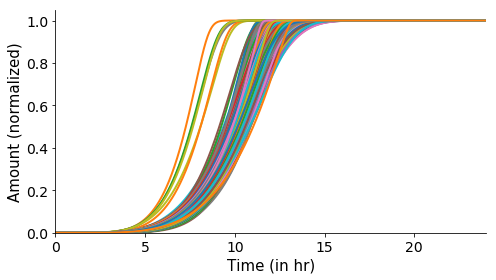

In [70]:
fig, ax = plt.subplots(figsize = (7, 4))
for n in range(len(mode2_100)):
    plt.plot(tspan/60, m2cyldkodf100wt.loc[n]['MLKLa_obs'].iloc[:]/m2alldf100wt['MLKLa_obs'].iloc[:].max(),label = 'pMLKL', lw=2)
plt.xlabel("Time (in hr)", fontsize=15)
plt.ylabel("Amount (normalized)", fontsize=15)
plt.xlim(xmin = 0, xmax = 24)
plt.ylim(ymin = 0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
# ax.set_xticks([0, 5, 10, 15, 20, 24])
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)
plt.tight_layout()
# plt.savefig('nerm_mode3_dynamics_CI_CII_necro_pmlkl.pdf')
plt.show() 

In [71]:
solvera20ko = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
a20ko = solvera20ko.run(initials = {m.A20(brip = None):0},
                         param_values=mode3_100, num_processors = 20)
m2a20kodf100wt = a20ko.dataframe

2021-12-12 14:43:31.173 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Simulator created
2021-12-12 14:43:31.179 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Equation mode set to "cython"
2021-12-12 14:43:31.213 - pysb.simulator.scipyode - INFO - [model_files.nerm] Simulation(s) started
2021-12-12 14:43:31.337 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Multi-processor (parallel) mode using 20 processes
2021-12-12 14:45:07.498 - pysb.simulator.scipyode - INFO - [model_files.nerm] All simulation(s) complete
2021-12-12 14:45:07.500 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor started
2021-12-12 14:45:09.338 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor finished


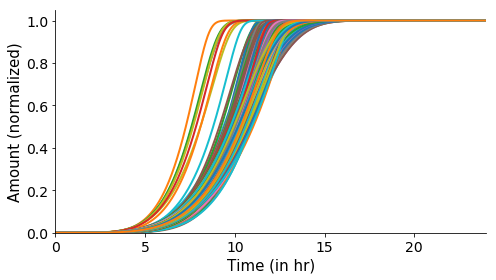

In [72]:
fig, ax = plt.subplots(figsize = (7, 4))
for n in range(len(mode3_100)):
    plt.plot(tspan/60, m2a20kodf100wt.loc[n]['MLKLa_obs'].iloc[:]/m2alldf100wt['MLKLa_obs'].iloc[:].max(),label = 'pMLKL', lw=2)
plt.xlabel("Time (in hr)", fontsize=15)
plt.ylabel("Amount (normalized)", fontsize=15)
plt.xlim(xmin = 0, xmax = 24)
plt.ylim(ymin = 0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
# ax.set_xticks([0, 5, 10, 15, 20, 24])
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)
plt.tight_layout()
# plt.savefig('nerm_mode3_dynamics_CI_CII_necro_pmlkl.pdf')
plt.show() 

In [73]:
solvercylda20ko = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
cylda20ko = solvercylda20ko.run(initials = {m.CYLD(brip=None, btraf = None):0, m.A20(brip = None):0},
                         param_values=mode3_100, num_processors = 20)
m2cylda20kodf100wt = cylda20ko.dataframe

2021-12-12 14:45:38.276 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Simulator created
2021-12-12 14:45:38.281 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Equation mode set to "cython"
2021-12-12 14:45:38.315 - pysb.simulator.scipyode - INFO - [model_files.nerm] Simulation(s) started
2021-12-12 14:45:38.641 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Multi-processor (parallel) mode using 20 processes
2021-12-12 14:47:10.334 - pysb.simulator.scipyode - INFO - [model_files.nerm] All simulation(s) complete
2021-12-12 14:47:10.336 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor started
2021-12-12 14:47:12.278 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor finished


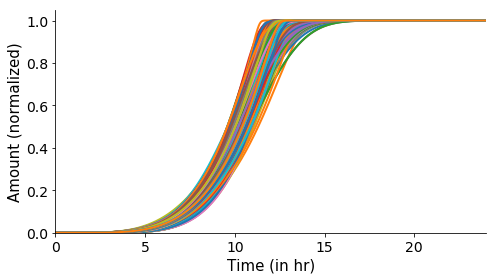

In [17]:
fig, ax = plt.subplots(figsize = (7, 4))
for n in range(len(mode2_100)):
    plt.plot(tspan/60, m2cylda20kodf100wt.loc[n]['MLKLa_obs'].iloc[:]/m2alldf100wt['MLKLa_obs'].iloc[:].max(),label = 'pMLKL', lw=2)
plt.xlabel("Time (in hr)", fontsize=15)
plt.ylabel("Amount (normalized)", fontsize=15)
plt.xlim(xmin = 0, xmax = 24)
plt.ylim(ymin = 0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
# ax.set_xticks([0, 5, 10, 15, 20, 24])
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)
plt.tight_layout()
# plt.savefig('nerm_mode3_dynamics_CI_CII_necro_pmlkl.pdf')
plt.show() 

In [81]:
m = model.components
tspan = np.linspace(0,1800,500)
threshold = 2772

In [103]:
mode2_100[0,14:]

array([1.96822190e-07, 6.00568498e-04, 1.00416096e-04, 3.20520940e-04,
       3.77982557e+00, 1.03238354e+03, 1.29001745e+00, 7.56145513e+02,
       3.00758146e-01, 1.60393865e-01, 4.48756625e-02, 3.06114545e-03,
       1.83352876e-06, 5.01358229e-06, 2.69838861e-06, 4.26616388e-04,
       8.60227476e-04, 3.03544405e-02, 2.31289042e-03, 4.47944006e+01,
       7.98360146e+01, 8.73496250e-01, 5.03634458e-04, 8.86778955e-02,
       2.14221824e-03, 2.84865204e-05, 5.88158464e+00, 1.00856022e-02,
       6.81617419e+01, 1.54698264e+01, 2.02369211e-05, 1.85060229e-03,
       5.88158464e+00, 1.22860070e-03, 1.00856022e-02, 3.58638738e-04,
       8.49315010e-05, 4.87716215e-02, 1.00362698e+00, 2.27053589e+02])

In [102]:
mode3_100[0,14:]

array([1.98794695e-07, 5.49030660e-05, 2.79985027e-04, 6.93725898e-02,
       4.02442372e+00, 3.34497415e+02, 1.16178260e-03, 1.37493377e-02,
       1.83963104e-07, 1.09571830e-01, 2.06022182e-03, 7.27252952e-03,
       1.56339761e-02, 1.22496256e-04, 2.40319546e-01, 1.98512681e-03,
       1.75780767e-01, 2.40319546e-01, 6.43362879e-07, 1.75780767e-01,
       2.00635884e+03, 6.62228312e-04, 1.07201489e-04, 6.72046457e-04,
       7.87039186e-03, 1.30055693e+00, 6.08007774e-02, 3.81244753e+01,
       5.45753992e-03, 1.65739974e+00, 1.19342779e-03, 3.03563288e-04,
       1.33209971e+01, 1.88650892e+00, 1.55022611e-04, 2.36576569e-03,
       5.26505520e-06, 2.41568281e+00, 9.17830983e-01, 4.92855732e+03])

In [82]:
solverwt2 = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
wtclus2 = solverwt2.run(param_values=mode2_100, num_processors = 20)
# a20clus1.save('h5mod/pydyno_s36prod_10k_5720_100tnf_c1parsmod_30hra20ko.h5',include_obs_exprs = True)
c2df100wt2 = wtclus2.dataframe

2022-01-02 21:56:18.270 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Simulator created
2022-01-02 21:56:18.283 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Equation mode set to "cython"
2022-01-02 21:56:18.354 - pysb.simulator.scipyode - INFO - [model_files.nerm] Simulation(s) started
2022-01-02 21:56:18.490 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Multi-processor (parallel) mode using 20 processes
2022-01-02 21:57:19.064 - pysb.simulator.scipyode - INFO - [model_files.nerm] All simulation(s) complete
2022-01-02 21:57:19.065 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor started
2022-01-02 21:57:19.929 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor finished


In [184]:
wtclus2.save('h5files/mode4_allpars_wtpmlkl.h5', include_obs_exprs=True)
# np.array(ttdm2ciapoe).dump(open('ttdfiles/mode1_allpars_ciapoe_ttds.npy', 'wb'))

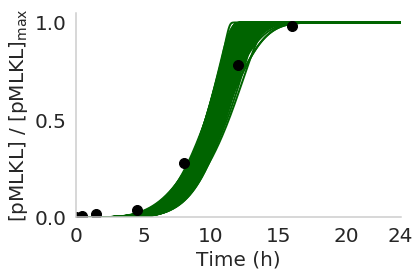

In [127]:
x = np.array([0, 30, 90, 270,480, 720, 960])
y100 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882, 0.2798939020159581, .7797294067, 0.98])
fig, ax = plt.subplots(figsize = (6, 4))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
for n in range(len(mode2_100)):
    plt.plot(tspan/60, c2df100wt2.loc[n]['MLKLa_obs'].iloc[:]/c2df100wt2['MLKLa_obs'].iloc[:].max(),
             color = 'darkgreen', lw=2)
plt.xlabel("Time (h)", fontsize=20)
plt.ylabel(r"[pMLKL] / [pMLKL]$_\mathrm{max}$", fontsize=20)
plt.xlim(xmin = 0, xmax = 16)
plt.ylim(ymin = 0)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
ax.grid(False)
ax.set_xticks([0, 5, 10, 15, 20, 24])
ax.set_yticks([0, 0.5, 1.0])
plt.plot(x/60, y100, 'o', color = 'black', ms = 10)
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)
plt.tight_layout()
plt.savefig('mode3_pmlkl_allpars_medaquacolor_nogridwdata.pdf')
plt.show() 

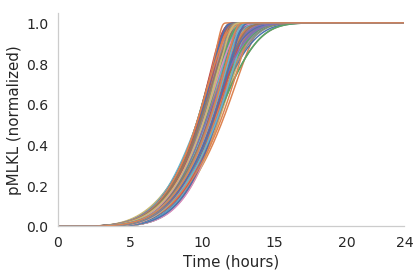

In [99]:
fig, ax = plt.subplots()
for n in range(len(mode2_100)):
    plt.plot(tspan/60, c2df100wt2.loc[n]['MLKLa_obs'].iloc[:]/5544, lw=1.5, 
             zorder = 1)
# colormap = plt.cm.Reds #nipy_spectral, Set1,Paired   
# colors = [colormap(i) for i in np.linspace(0, 1,len(ax.lines))]
# for i,j in enumerate(ax.lines):
#     j.set_color(colors[i])
# ax1.legend(loc=2)    
plt.xlabel("Time (hours)", fontsize=15)
plt.ylabel("pMLKL (normalized)", fontsize=15)
plt.xlim(xmin = 0, xmax = 16)
plt.ylim(ymin = 0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
ax.set_xticks([0, 5, 10, 15, 20, 24])
ax.grid(False)
plt.tight_layout()
# plt.savefig('pmlkl_allpars_clus0_tnf100_noframe.pdf')
plt.show() 

In [83]:
solvera202 = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
a20clus2 = solvera202.run(initials = {m.A20(brip = None):0},
                         param_values=mode2_100, num_processors = 20)
# a20clus1.save('h5mod/pydyno_s36prod_10k_5720_100tnf_c1parsmod_30hra20ko.h5',include_obs_exprs = True)
c2df100a202 = a20clus2.dataframe

2022-01-02 21:57:21.172 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Simulator created
2022-01-02 21:57:21.178 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Equation mode set to "cython"
2022-01-02 21:57:21.213 - pysb.simulator.scipyode - INFO - [model_files.nerm] Simulation(s) started
2022-01-02 21:57:21.318 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Multi-processor (parallel) mode using 20 processes
2022-01-02 21:58:21.821 - pysb.simulator.scipyode - INFO - [model_files.nerm] All simulation(s) complete
2022-01-02 21:58:21.822 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor started
2022-01-02 21:58:22.850 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor finished


In [185]:
a20clus2.save('h5files/mode4_allpars_a20ko.h5', include_obs_exprs=True)
# np.array(ttdm2ciapoe).dump(open('ttdfiles/mode1_allpars_ciapoe_ttds.npy', 'wb'))

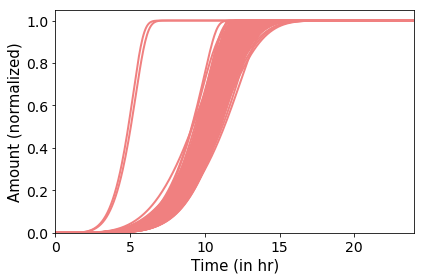

In [86]:
plt.figure()
for n in range(len(mode2_100)):
    plt.plot(tspan/60, c2df100a202.loc[n]['MLKLa_obs'].iloc[:]/c2df100a202['MLKLa_obs'].iloc[:].max(),
             color = 'lightcoral', lw=2)
plt.xlabel("Time (in hr)", fontsize=15)
plt.ylabel("Amount (normalized)", fontsize=15)
plt.xlim(xmin = 0, xmax = 24)
plt.ylim(ymin = 0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# right_side = ax.spines["right"]
# right_side.set_visible(False)
# top = ax.spines["top"]
# top.set_visible(False)
# plt.xticks([0, 5, 10, 15, 20, 24])
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)
plt.tight_layout()
# plt.savefig('nerm_mode1e_dynamics_CI_CII_necro_pmlkl.pdf')
plt.show() 

In [84]:
solvercyld2 = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
cyldclus2 = solvercyld2.run(initials = {m.CYLD(brip=None, btraf = None):0},
                         param_values=mode2_100, num_processors = 20)
# cyldclus0.save('h5mod/pydyno_s36prod_10k_5720_100tnf_c0parsmod_30hcyldko.h5',include_obs_exprs = True)
c2df100cyld = cyldclus2.dataframe

2022-01-02 21:58:24.069 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Simulator created
2022-01-02 21:58:24.074 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Equation mode set to "cython"
2022-01-02 21:58:24.110 - pysb.simulator.scipyode - INFO - [model_files.nerm] Simulation(s) started
2022-01-02 21:58:24.215 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Multi-processor (parallel) mode using 20 processes
2022-01-02 21:59:22.427 - pysb.simulator.scipyode - INFO - [model_files.nerm] All simulation(s) complete
2022-01-02 21:59:22.429 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor started
2022-01-02 21:59:23.353 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor finished


In [186]:
cyldclus2.save('h5files/mode4_allpars_cyldko.h5', include_obs_exprs=True)
# np.array(ttdm2ciapoe).dump(open('ttdfiles/mode1_allpars_ciapoe_ttds.npy', 'wb'))

In [112]:
solvercylda200 = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
cyldclusa200 = solvercylda200.run(initials = {m.CYLD(brip=None, btraf = None):0,m.A20(brip = None):0},
                         param_values=mode2_100, num_processors = 20)
# cyldclus0.save('h5mod/pydyno_s36prod_10k_5720_100tnf_c0parsmod_30hcyldko.h5',include_obs_exprs = True)
c0df100cylda20 = cyldclusa200.dataframe

2022-01-06 22:02:12.464 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Simulator created
2022-01-06 22:02:12.476 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Equation mode set to "cython"
2022-01-06 22:02:12.546 - pysb.simulator.scipyode - INFO - [model_files.nerm] Simulation(s) started
2022-01-06 22:02:12.672 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Multi-processor (parallel) mode using 20 processes
2022-01-06 22:03:11.094 - pysb.simulator.scipyode - INFO - [model_files.nerm] All simulation(s) complete
2022-01-06 22:03:11.095 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor started
2022-01-06 22:03:11.959 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor finished


In [187]:
cyldclusa200.save('h5files/mode4_allpars_cylda20dko.h5', include_obs_exprs=True)
# np.array(ttdm2ciapoe).dump(open('ttdfiles/mode1_allpars_ciapoe_ttds.npy', 'wb'))

In [113]:
df_threshtimesc2100cylda20 = c0df100cylda20.groupby('simulation').apply(lambda x: (x > threshold).idxmax()).apply(lambda x: [y[1] for y in x])

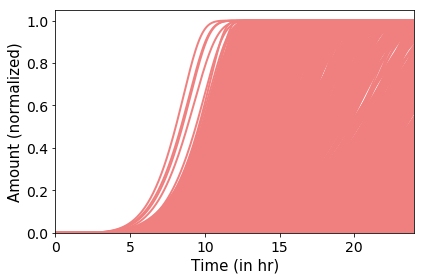

In [87]:
plt.figure()
for n in range(len(mode2_100)):
    plt.plot(tspan/60, c2df100cyld.loc[n]['MLKLa_obs'].iloc[:]/c2df100cyld['MLKLa_obs'].iloc[:].max(),
             color = 'lightcoral', lw=2)
plt.xlabel("Time (in hr)", fontsize=15)
plt.ylabel("Amount (normalized)", fontsize=15)
plt.xlim(xmin = 0, xmax = 24)
plt.ylim(ymin = 0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# right_side = ax.spines["right"]
# right_side.set_visible(False)
# top = ax.spines["top"]
# top.set_visible(False)
# plt.xticks([0, 5, 10, 15, 20, 24])
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)
plt.tight_layout()
# plt.savefig('nerm_mode1e_dynamics_CI_CII_necro_pmlkl.pdf')
plt.show() 

In [88]:
df_threshtimesc2100wt = c2df100wt2.groupby('simulation').apply(lambda x: (x > threshold).idxmax()).apply(lambda x: [y[1] for y in x])
df_threshtimesc2100a20   = c2df100a202.groupby('simulation').apply(lambda x: (x > threshold).idxmax()).apply(lambda x: [y[1] for y in x])
df_threshtimesc2100cyld = c2df100cyld.groupby('simulation').apply(lambda x: (x > threshold).idxmax()).apply(lambda x: [y[1] for y in x])

In [ ]:
df = pd.DataFrame(c2df100wt2['MLKLa_obs'])
df.reset_index(inplace=True)
df = df.rename(columns = {'index':'Time'})

In [129]:
thresh = 2772
ttdwt = []
for j in range(len(mode2_100)):
#     print(f"this is output line {j}")
    i_range = range(len(c2df100wt2.loc[j]['MLKLa_obs']))
    for i in i_range:
        if c2df100wt2.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdwt.append(c2df100wt2.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdwt.append(np.inf)
for i in range(len(ttdwt)):
    if ttdwt[i] == np.inf:
        ttdwt[i] = 2100
# print('TTD = ', m3alldf100wt['time'][idx])        

In [194]:
np.array(ttdwt).dump(open('ttdfiles/mode4_allpars_wtpmlkl_ttds.npy', 'wb'))

In [132]:
thresh = 2772
ttda20 = []
for j in range(len(mode2_100)):
#     print(f"this is output line {j}")
    i_range = range(len(c2df100a202.loc[j]['MLKLa_obs']))
    for i in i_range:
#         print(m3alldf100wt.loc[j]['MLKLa_obs'].iloc[i])
        if c2df100a202.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttda20.append(c2df100a202.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttda20.append(np.inf)
for i in range(len(ttda20)):
    if ttda20[i] == np.inf:
        ttda20[i] = 2100
# print('TTD = ', m3alldf100wt['time'][idx])  

In [195]:
np.array(ttda20).dump(open('ttdfiles/mode4_allpars_a20ko_ttds.npy', 'wb'))

In [133]:
thresh = 2772
ttdcyld = []
for j in range(len(mode2_100)):
#     print(f"this is output line {j}")
    i_range = range(len(c2df100cyld.loc[j]['MLKLa_obs']))
    for i in i_range:
#         print(m3alldf100wt.loc[j]['MLKLa_obs'].iloc[i])
        if c2df100cyld.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdcyld.append(c2df100cyld.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdcyld.append(np.inf)
for i in range(len(ttdcyld)):
    if ttdcyld[i] == np.inf:
        ttdcyld[i] = 2100
# for i in range(0, 248):
#     if ttdcylda20mod3[i] == np.inf:
#         ttdcylda20mod3[i] = 2080
# for i in range(248, 497):
#     if ttdcylda20mod3[i] == np.inf:
#         ttdcylda20mod3[i] = 2090
# for i in range(497,745):
#     if ttdcylda20mod3[i] == np.inf:
#         ttdcylda20mod3[i] = 2100
# for i in range(745,994):
#     if ttdcylda20mod3[i] == np.inf:
#         ttdcylda20mod3[i] = 2110
# for i in range(994,1243):
#     if ttdcylda20mod3[i] == np.inf:
#         ttdcylda20mod3[i] = 2120
# for i in range(1243,1492):
#     if ttdcylda20mod3[i] == np.inf:
#         ttdcylda20mod3[i] = 2130
# print('TTD = ', m3alldf100wt['time'][idx])  

In [196]:
np.array(ttdcyld).dump(open('ttdfiles/mode4_allpars_cyldko_ttds.npy', 'wb'))

In [192]:
ttdcyld.count(2100)

473

In [176]:
thresh = 2772
ttdcyld4 = []
for j in range(len(mode2_100)):
#     print(f"this is output line {j}")
    i_range = range(len(c2df100cyld.loc[j]['MLKLa_obs']))
    for i in i_range:
#         print(m3alldf100wt.loc[j]['MLKLa_obs'].iloc[i])
        if c2df100cyld.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdcyld4.append(c2df100cyld.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdcyld4.append(np.inf)
# for i in range(len(ttdcyld2)):
#     if ttdcyld2[i] == np.inf:
#         ttdcyld2[i] = 2100
for i in range(0, 118):
    if ttdcyld4[i] == np.inf:
        ttdcyld4[i] = 2100
for i in range(118, 236):
    if ttdcyld4[i] == np.inf:
        ttdcyld4[i] = 2110
for i in range(236,354):
    if ttdcyld4[i] == np.inf:
        ttdcyld4[i] = 2120
for i in range(354,473):
    if ttdcyld4[i] == np.inf:
        ttdcyld4[i] = 2130
# for i in range(400,473):
#     if ttdcyld4[i] == np.inf:
#         ttdcyld4[i] = 2120
# for i in range(1243,1492):
#     if ttdcyld2[i] == np.inf:
#         ttdcyld2[i] = 2130
# print('TTD = ', m3alldf100wt['time'][idx])  

In [197]:
np.array(ttdcyld4).dump(open('ttdfiles/mode4_allpars_cyldko_modttds.npy', 'wb'))

In [134]:
thresh = 2772
ttdcylda20 = []
for j in range(len(mode2_100)):
#     print(f"this is output line {j}")
    i_range = range(len(c0df100cylda20.loc[j]['MLKLa_obs']))
    for i in i_range:
#         print(m3alldf100wt.loc[j]['MLKLa_obs'].iloc[i])
        if c0df100cylda20.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdcylda20.append(c0df100cylda20.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdcylda20.append(np.inf)
for i in range(len(ttdcylda20)):
    if ttdcylda20[i] == np.inf:
        ttdcylda20[i] = 2100
# print('TTD = ', m3alldf100wt['time'][idx])  

In [150]:
print(range(0, 497)) # len(ttdcylda20[:497])))
print(range(497,994))
print(range(994,1492))

a = range(0, 497)
b = range(497,994)
c = range(994,1492)

print(len(a))
print(len(b))
print(len(c))

range(0, 497)
range(497, 994)
range(994, 1492)
497
497
498


In [155]:
thresh = 2772
ttdcylda20mod2 = []
for j in range(len(mode2_100)):
#     print(f"this is output line {j}")
    i_range = range(len(c0df100cylda20.loc[j]['MLKLa_obs']))
    for i in i_range:
#         print(m3alldf100wt.loc[j]['MLKLa_obs'].iloc[i])
        if c0df100cylda20.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdcylda20mod2.append(c0df100cylda20.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdcylda20mod2.append(np.inf)
for i in range(0, 497):
    if ttdcylda20mod2[i] == np.inf:
        ttdcylda20mod2[i] = 2080
for i in range(497,994):
    if ttdcylda20mod2[i] == np.inf:
        ttdcylda20mod2[i] = 2100
for i in range(994,1492):
    if ttdcylda20mod2[i] == np.inf:
        ttdcylda20mod2[i] = 2120
# print('TTD = ', m3alldf100wt['time'][idx])  

In [156]:
thresh = 2772
ttdcylda20mod3 = []
for j in range(len(mode2_100)):
#     print(f"this is output line {j}")
    i_range = range(len(c0df100cylda20.loc[j]['MLKLa_obs']))
    for i in i_range:
#         print(m3alldf100wt.loc[j]['MLKLa_obs'].iloc[i])
        if c0df100cylda20.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdcylda20mod3.append(c0df100cylda20.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdcylda20mod3.append(np.inf)
for i in range(0, 248):
    if ttdcylda20mod3[i] == np.inf:
        ttdcylda20mod3[i] = 2080
for i in range(248, 497):
    if ttdcylda20mod3[i] == np.inf:
        ttdcylda20mod3[i] = 2090
for i in range(497,745):
    if ttdcylda20mod3[i] == np.inf:
        ttdcylda20mod3[i] = 2100
for i in range(745,994):
    if ttdcylda20mod3[i] == np.inf:
        ttdcylda20mod3[i] = 2110
for i in range(994,1243):
    if ttdcylda20mod3[i] == np.inf:
        ttdcylda20mod3[i] = 2120
for i in range(1243,1492):
    if ttdcylda20mod3[i] == np.inf:
        ttdcylda20mod3[i] = 2130
# print('TTD = ', m3alldf100wt['time'][idx])  

In [179]:
thresh = 2772
ttdcylda20mod2 = []
for j in range(len(mode2_100)):
#     print(f"this is output line {j}")
    i_range = range(len(c0df100cylda20.loc[j]['MLKLa_obs']))
    for i in i_range:
#         print(m3alldf100wt.loc[j]['MLKLa_obs'].iloc[i])
        if c0df100cylda20.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdcylda20mod2.append(c0df100cylda20.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdcylda20mod2.append(np.inf)
for i in range(0, 124):
    if ttdcylda20mod2[i] == np.inf:
        ttdcylda20mod2[i] = 2070
for i in range(124, 248):
    if ttdcylda20mod2[i] == np.inf:
        ttdcylda20mod2[i] = 2080
for i in range(248, 497):
    if ttdcylda20mod2[i] == np.inf:
        ttdcylda20mod2[i] = 2090
for i in range(497,745):
    if ttdcylda20mod2[i] == np.inf:
        ttdcylda20mod2[i] = 2100
for i in range(745,994):
    if ttdcylda20mod2[i] == np.inf:
        ttdcylda20mod2[i] = 2110
for i in range(994,1243):
    if ttdcylda20mod2[i] == np.inf:
        ttdcylda20mod2[i] = 2120
for i in range(1243,1492):
    if ttdcylda20mod2[i] == np.inf:
        ttdcylda20mod2[i] = 2130
# print('TTD = ', m3alldf100wt['time'][idx])  

In [198]:
np.array(ttdcylda20mod2).dump(open('ttdfiles/mode4_allpars_cylda20dko_modttds.npy', 'wb'))

In [157]:
print(len(ttdcylda20mod3))

1492


In [141]:
m3occurrenceswt = ttdwt.count(2100)
m3occurrencesa20 = ttda20.count(2100)
m3occurrencescyld = ttdcyld.count(2100)
m3occurrencescylda20 = ttdcylda20.count(2100)
print(m3occurrenceswt)
print(m3occurrencesa20)
print(m3occurrencescyld)
print(m3occurrencescylda20)

11
10
473
1492


In [199]:
mode1df = pd.DataFrame({'WT': ttdwt, 
                         'A20 KO': ttda20,
                          'CYLD KO': ttdcyld4,
                       'A20;CYLD DKO': ttdcylda20mod2})
dfclus0n = pd.DataFrame(data = mode1df, columns = ['WT','A20 KO', 'CYLD KO', 'A20;CYLD DKO'])
dfclus1n = pd.melt(dfclus0n)

In [201]:
dfclus0n.to_csv("mode1_allparsdf_wmodttds.csv")

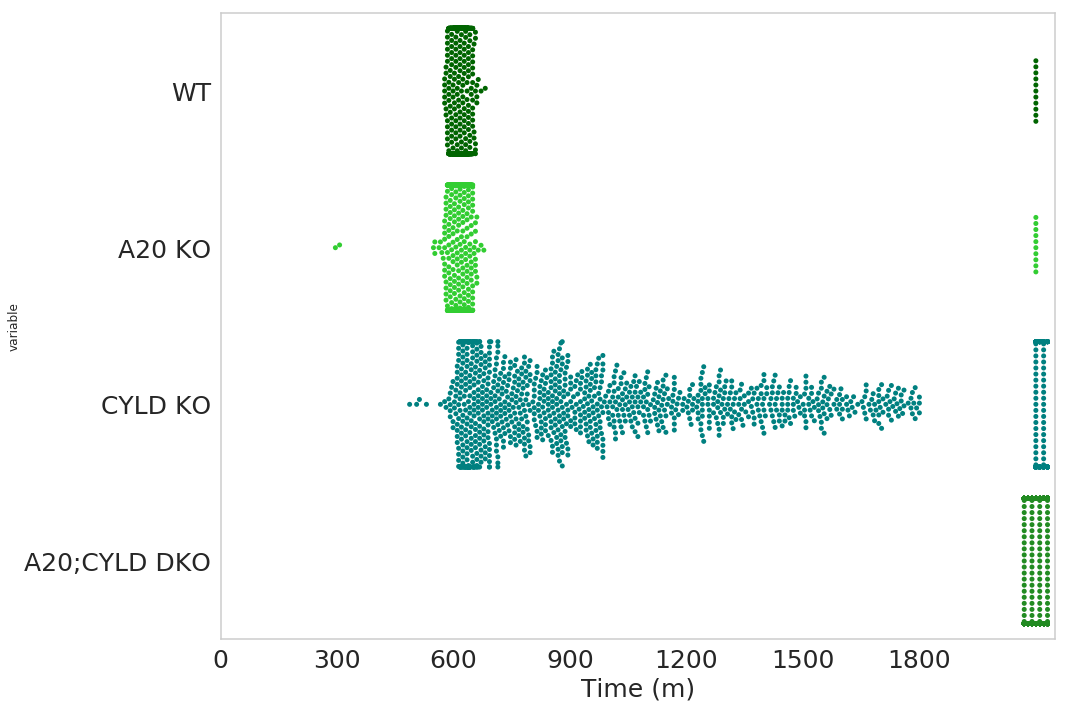

In [204]:
sns.set_style("whitegrid", {'axes.grid' : False})
fig, ax = plt.subplots(figsize = (15,10))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
my_pal = {"WT": "darkgreen", "A20 KO": "limegreen", "CYLD KO":"teal", 'A20;CYLD DKO': 'forestgreen'}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b = sns.swarmplot(x="value", y="variable", data=dfclus1n, zorder=2, palette=my_pal)
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b.set_xlabel("Time (m)",fontsize=25)
plt.xticks(fontsize = 25)
# b.set_ylabel("Cluster 0 New",fontsize=15)
b.tick_params(labelsize=25)
plt.xlim(xmax = 2150, xmin = 0)
ax.set_xticks([0,300, 600, 900, 1200, 1500,1800])
plt.tight_layout()
plt.savefig('pmlkl_cylda20dko_100tnf_mode3_swarm_greencolors_ttdupdated_modcylda20swap.pdf')
plt.show()

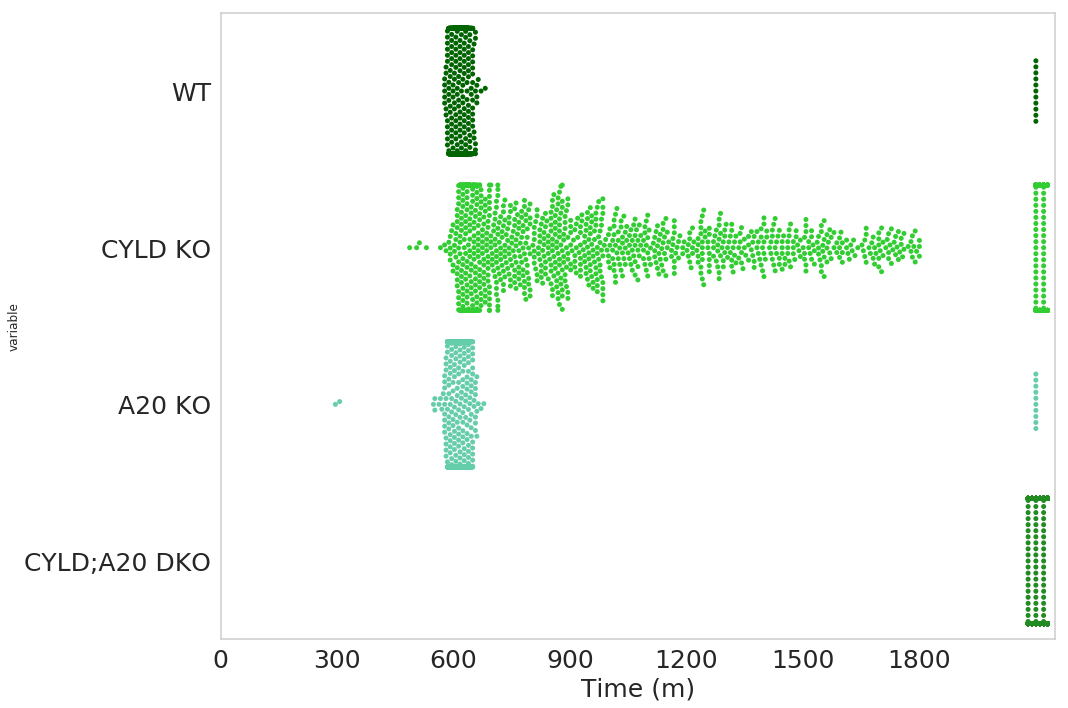

In [178]:
sns.set_style("whitegrid", {'axes.grid' : False})
fig, ax = plt.subplots(figsize = (15,10))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
my_pal = {"WT": "darkgreen", "CYLD KO": "limegreen", "A20 KO":"mediumaquamarine", 'CYLD;A20 DKO': 'forestgreen'}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b = sns.swarmplot(x="value", y="variable", data=dfclus1n, zorder=2, palette=my_pal)
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b.set_xlabel("Time (m)",fontsize=25)
plt.xticks(fontsize = 25)
# b.set_ylabel("Cluster 0 New",fontsize=15)
b.tick_params(labelsize=25)
plt.xlim(xmax = 2150, xmin = 0)
ax.set_xticks([0,300, 600, 900, 1200, 1500,1800])
plt.tight_layout()
# plt.savefig('pmlkl_cylda20dko_100tnf_mode3_swarm_greencolors_ttdupdated_mod.pdf')
plt.show()

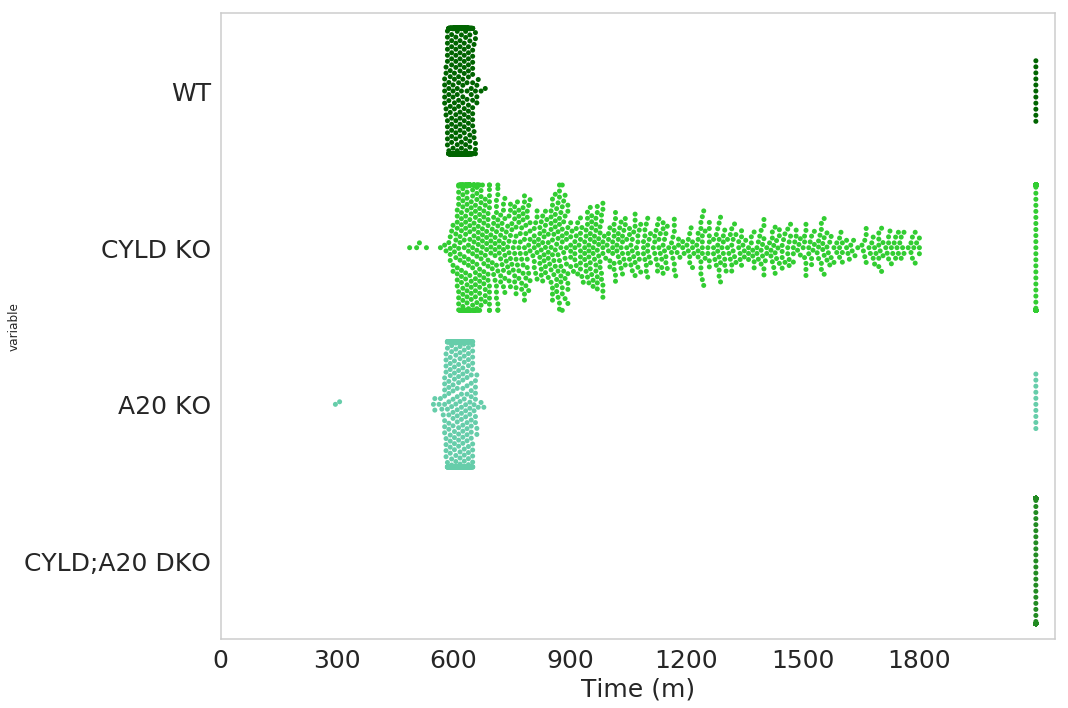

In [140]:
sns.set_style("whitegrid", {'axes.grid' : False})
fig, ax = plt.subplots(figsize = (15,10))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
my_pal = {"WT": "darkgreen", "CYLD KO": "limegreen", "A20 KO":"mediumaquamarine", 'CYLD;A20 DKO': 'forestgreen'}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b = sns.swarmplot(x="value", y="variable", data=dfclus1n, zorder=2, palette=my_pal)
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b.set_xlabel("Time (m)",fontsize=25)
plt.xticks(fontsize = 25)
# b.set_ylabel("Cluster 0 New",fontsize=15)
b.tick_params(labelsize=25)
plt.xlim(xmax = 2150, xmin = 0)
ax.set_xticks([0,300, 600, 900, 1200, 1500,1800])
plt.tight_layout()
plt.savefig('pmlkl_cylda20dko_100tnf_mode3_swarm_greencolors_ttdupdated.pdf')
plt.show()

In [118]:
#['lightcoral', 'lightseagreen', 'mediumpurple', 'peru']
mode1df = pd.DataFrame({'WT': df_threshtimesc2100wt['MLKLa_obs'], 
                          'CYLDKO': df_threshtimesc2100cyld['MLKLa_obs'],
                          'A20KO': df_threshtimesc2100a20['MLKLa_obs'],
                       'CYLDKOA20KO': df_threshtimesc2100cylda20['MLKLa_obs']})
dfclus0n = pd.DataFrame(data = mode1df, columns = ['WT', 'CYLDKO','A20KO', 'CYLD;A20DKO'])
dfclus0n = pd.melt(dfclus0n)

In [89]:
#['lightcoral', 'lightseagreen', 'mediumpurple', 'peru']
mode2df = pd.DataFrame({'WT': df_threshtimesc2100wt['MLKLa_obs'], 
                          'CYLDKO': df_threshtimesc2100cyld['MLKLa_obs'],
                          'A20KO': df_threshtimesc2100a20['MLKLa_obs']})
dfclus2n = pd.DataFrame(data = mode2df, columns = ['WT', 'CYLDKO','A20KO'])
dfclus2n = pd.melt(dfclus2n)

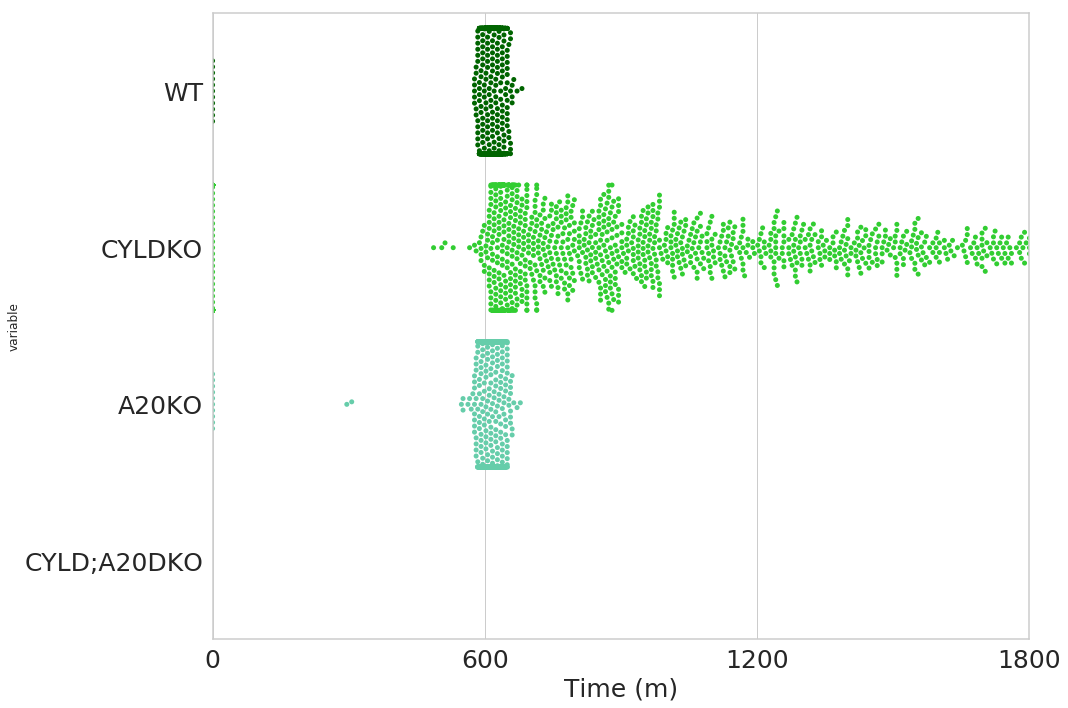

In [124]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize = (15,10))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
my_pal = {"WT": "darkgreen", "CYLDKO": "limegreen", "A20KO":"mediumaquamarine", 'CYLD;A20DKO': 'forestgreen'}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b = sns.swarmplot(x="value", y="variable", data=dfclus0n, zorder=2, palette=my_pal)
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b.set_xlabel("Time (m)",fontsize=25)
plt.xticks(fontsize = 25)
# b.set_ylabel("Cluster 0 New",fontsize=15)
b.tick_params(labelsize=25)
plt.xlim(xmax = 1800, xmin = 2)
ax.set_xticks([0, 600, 1200, 1800])
plt.tight_layout()
plt.savefig('pmlkl_cylda20dko_100tnf_mode3_swarm_greencolors.pdf')
plt.show()

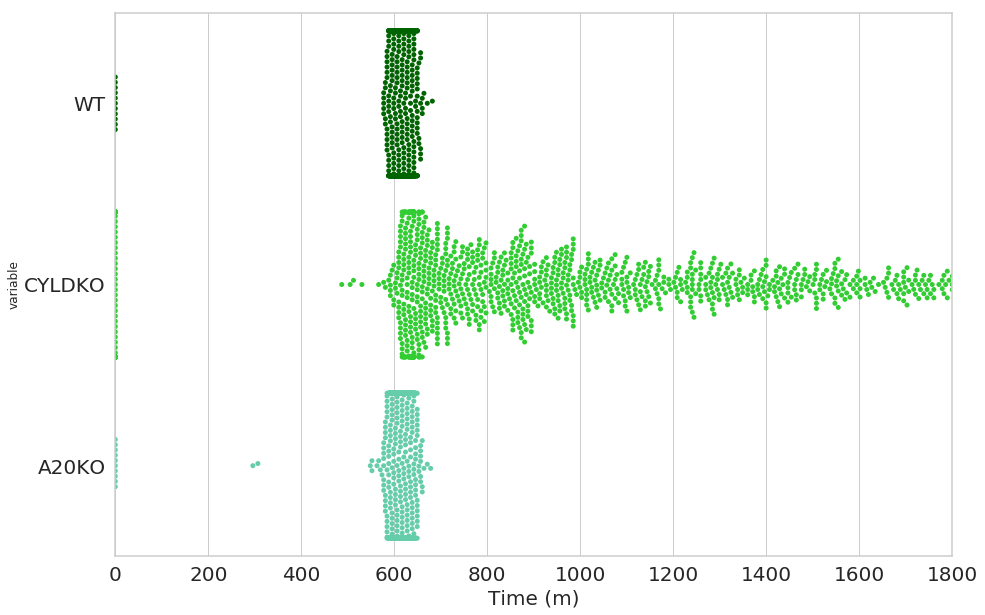

In [108]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize = (15,10))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
my_pal = {"WT": "darkgreen", "CYLDKO": "limegreen", "A20KO":"mediumaquamarine"}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b = sns.swarmplot(x="value", y="variable", data=dfclus2n, zorder=2, palette=my_pal)
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b.set_xlabel("Time (m)",fontsize=20)
plt.xticks(fontsize = 20)
# b.set_ylabel("Cluster 0 New",fontsize=15)
b.tick_params(labelsize=20)
plt.xlim(xmax = 1800, xmin = 0)
plt.savefig('pmlkl_cyldkoa20ko_100tnf_mode3_swarm_greencolors.pdf')
plt.show()